# Climate Prediction Results

In [1]:
import pandas as pd
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def train_single_label_exp(exp_id, season, label_interest, model_exp, name_model, region):
    labels_to_remove = ["HWN", "HWF", "HWD", "HWA", "HWM"]
    labels_to_remove.remove(label_interest)
    display(get_info_experiment(exp_id, metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path))
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    data[season].drop(columns=labels_to_remove, inplace=True)
    experiment_1 = PredictionExperiment(data, [label_interest], [model_exp], [name_model], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    display(experiment_1.results)
    return experiment_1

def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:,.2f}'.format):  # more options can be specified also
        display(df)

In [4]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## California

In [5]:
region = "california"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,6e47cb06,predictor_6e47cb06_1.parquet,1,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
1,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
2,6e47cb06,predictor_6e47cb06_3.parquet,3,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
3,6e47cb06,predictor_6e47cb06_4.parquet,4,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
4,6e47cb06,predictor_6e47cb06_5.parquet,5,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
5,6e47cb06,predictor_6e47cb06_6.parquet,6,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
6,6e47cb06,predictor_6e47cb06_7.parquet,7,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
7,6e47cb06,predictor_6e47cb06_8.parquet,8,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
8,6e47cb06,predictor_6e47cb06_9.parquet,9,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
9,6e47cb06,predictor_6e47cb06_10.parquet,10,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...


In [6]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-1.642946,-0.451826,-0.356029,-0.574733,-0.555294,-0.716166,6e47cb06
1,RF5,1,r2,prediction,0.061589,0.188855,-0.146274,-0.261316,-0.245859,-0.080601,6e47cb06
2,RF10,1,r2,prediction,-0.206871,0.027445,-0.177618,-0.240291,-0.350948,-0.189657,6e47cb06
3,SVR-rbf,1,r2,prediction,-0.597662,-0.571592,-0.680761,-0.699400,-0.681742,-0.646231,6e47cb06
4,XGB10,1,r2,prediction,-0.486964,-0.408386,-0.011742,-0.344260,-0.282488,-0.306768,6e47cb06
...,...,...,...,...,...,...,...,...,...,...,...
6403,Linear,8,mae,TSCV,0.245990,1.003778,0.892195,0.422024,0.681094,0.649016,5cb3fa02
6404,Linear,9,mae,TSCV,0.314457,1.688518,1.036244,0.686407,1.143567,0.973839,5cb3fa02
6405,Linear,10,mae,TSCV,0.455515,2.486041,1.632246,0.719400,1.301669,1.318974,5cb3fa02
6406,Linear,11,mae,TSCV,0.282616,1.231804,1.106450,0.553996,0.889646,0.812902,5cb3fa02


In [7]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")

In [8]:
summary_tscv_r2

,model,season,id_data,index,best_value,filename,indices
0,CNNRNN16,7,5cb3fa02,Average,0.671888,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
1,SRNN16,5,5cb3fa02,Average,0.632354,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
2,CNNRNN16,8,5cb3fa02,HWA,0.658876,predictor_5cb3fa02_8.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
3,CNNRNN16,7,5cb3fa02,HWA,0.600327,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
4,CNNRNN16,7,5cb3fa02,HWD,0.714737,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
5,SRNN16,5,5cb3fa02,HWD,0.704682,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
6,RNN16,5,5cb3fa02,HWF,0.706816,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
7,SLSTM16,9,5cb3fa02,HWF,0.698622,predictor_5cb3fa02_9.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
8,CNNRNN16,8,5cb3fa02,HWM,0.667245,predictor_5cb3fa02_8.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
9,CNNRNN16,7,5cb3fa02,HWM,0.657651,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...


In [9]:
cv_r2_seasons = {}
cv_mape_seasons = {}
cv_mae_seasons = {}

r2_seasons = {}
mape_seasons = {}
mae_seasons = {}

tscv_r2_seasons = {}
tscv_mape_seasons = {}
tscv_mae_seasons = {}

for i in range(13):
    results_season = results[results["season"]==i]
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="prediction", top_n=1)

    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    cv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="CV", top_n=1)

    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)
    tscv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))

tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
tscv_mae_seasons = pd.concat(list(tscv_mae_seasons.values()))

r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))
mae_seasons = pd.concat(list(mae_seasons.values()))


In [39]:
display_full(cv_r2_seasons)

,model,index,best_value,id_data,filename,season,indices
0,SVR-rbf,Average,-1.09,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
1,SVR-rbf,HWA,-0.88,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
2,SVR-cubic,HWD,-0.76,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
3,SVR-cubic,HWF,-0.92,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
4,SVR-cubic,HWM,-0.84,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
5,SVR-rbf,HWN,-1.01,50a3f070,predictor_50a3f070_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
0,XGBL15,Average,-1.97,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
1,XGBL15,HWA,-2.10,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
2,Linear,HWD,-1.85,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
3,SVR-linear,HWF,-2.40,8359c65d,predictor_8359c65d_2.parquet,2,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...


## Analyze good results by experiment

In [11]:
id = "5cb3fa02"
season = 10
exp = train_single_label_exp(id, season, "HWD",RandomForestRegressor(random_state=42, n_estimators=15), "RF15", "california")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
f27c56aa,index_f27c56aa.parquet,anom,1,SP,236|246|37.5|43,1980-2010,1972-2022
5b9237bf,index_5b9237bf.parquet,anom,1,SP,236|246|32|37.5,1980-2010,1972-2022
46fa0cb8,index_46fa0cb8.parquet,max,1,SP,190|235|15|43,NoRef,1972-2022
63520cd8,index_63520cd8.parquet,anom,1,U10,236|246|32|43,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022
ONI,oni.txt,Anom,3,SST,190|240|-5|5,30yearsliding,1972-2022
SAM,sam.txt,DifAnom,1,SLP,X|X|-65|-40,1981-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Model,Season,Metric,Stage,HWD,Average
0,RF15,10,r2,TSCV,0.312670,0.312670
0,RF15,10,mape,TSCV,0.826744,0.826744


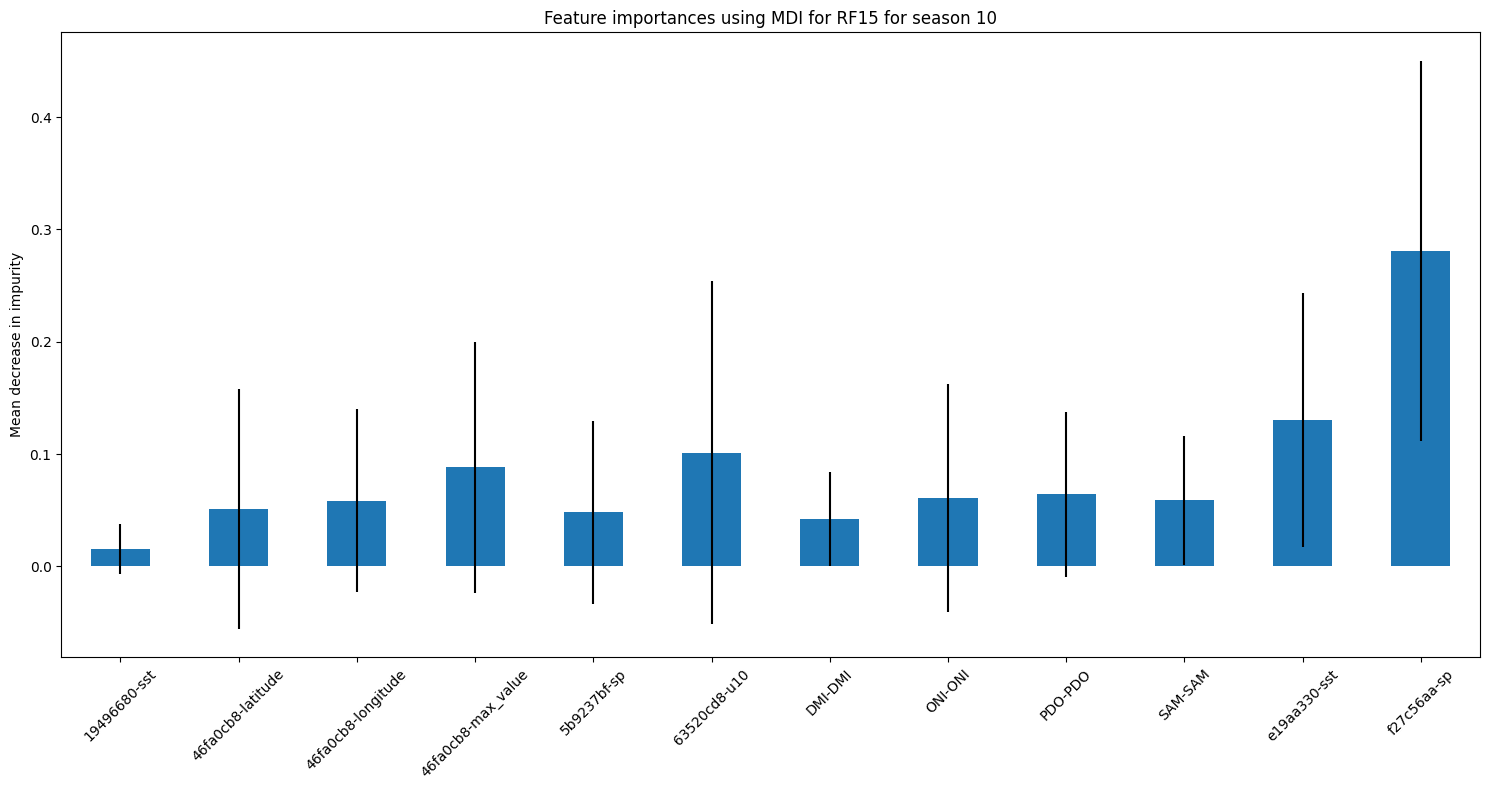

In [12]:
exp.get_feature_importance(season, "RF15", method="mdi")

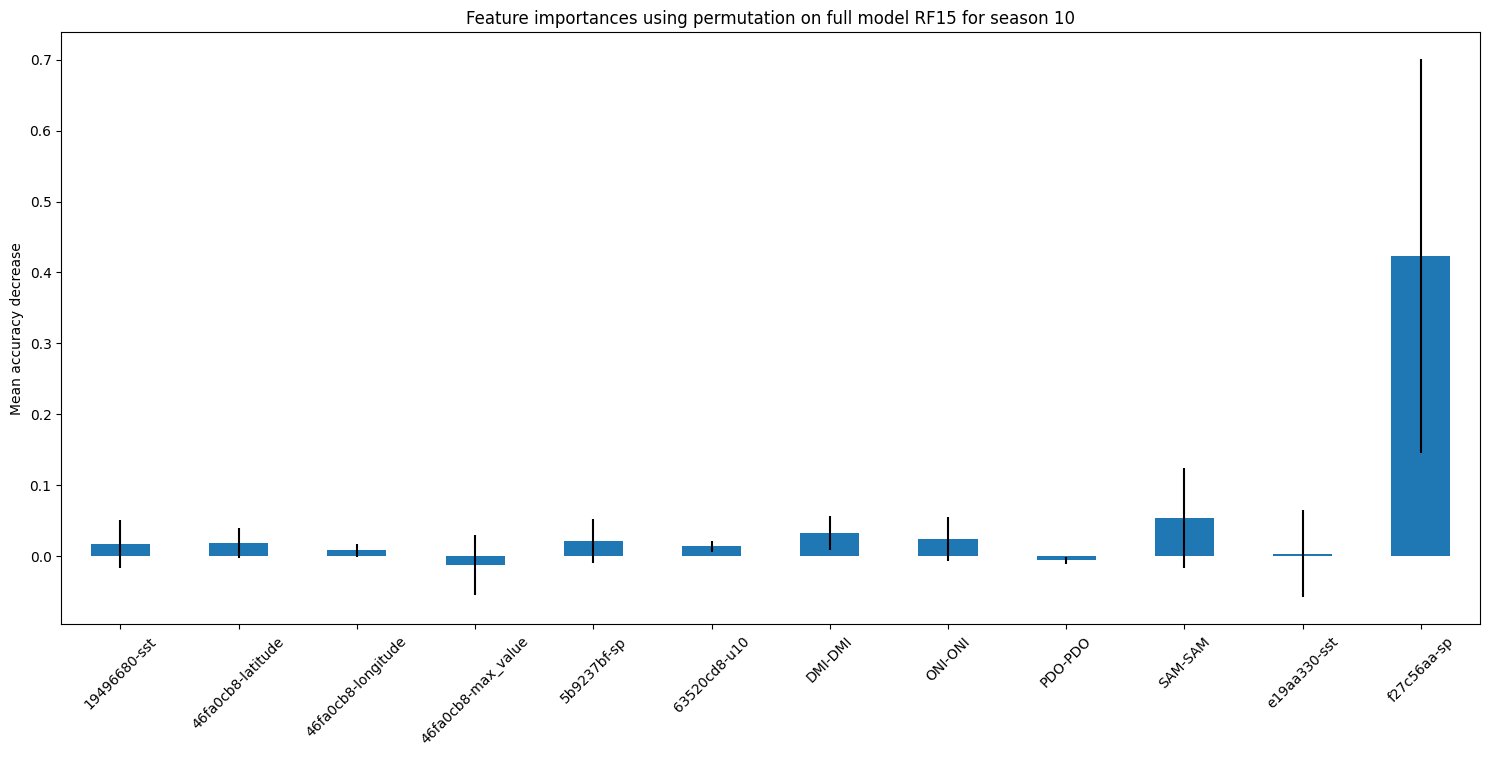

In [13]:
exp.get_feature_importance(season, "RF15", method="permutation")

In [14]:
id = "5cb3fa02"
season = 1
exp = train_single_label_exp(id, season, "HWN",XGBRegressor(booster="gblinear",random_state=42, n_estimators=15, learning_rate=0.1), "XGBL15", "california")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
f27c56aa,index_f27c56aa.parquet,anom,1,SP,236|246|37.5|43,1980-2010,1972-2022
5b9237bf,index_5b9237bf.parquet,anom,1,SP,236|246|32|37.5,1980-2010,1972-2022
46fa0cb8,index_46fa0cb8.parquet,max,1,SP,190|235|15|43,NoRef,1972-2022
63520cd8,index_63520cd8.parquet,anom,1,U10,236|246|32|43,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022
ONI,oni.txt,Anom,3,SST,190|240|-5|5,30yearsliding,1972-2022
SAM,sam.txt,DifAnom,1,SLP,X|X|-65|-40,1981-2010,1972-2022


,Model,Season,Metric,Stage,HWN,Average
0,XGBL15,1,r2,TSCV,3.203136e-01,3.203136e-01
0,XGBL15,1,mape,TSCV,3.444594e+14,3.444594e+14


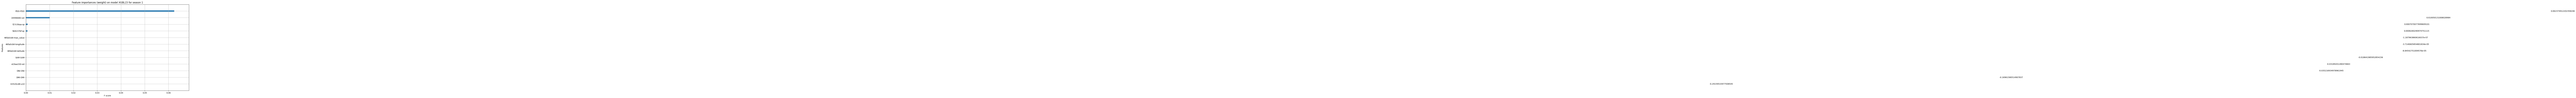

In [15]:
exp.get_feature_importance(season, "XGBL15", method="xgboost", xgbtype="weight")

## Chile

In [16]:
region = "chile"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [17]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-0.554116,-0.486005,-0.552474,-0.218203,0.159549,-0.330250,f2a9d7a9
1,RF5,1,r2,prediction,-2.092453,-1.222445,-1.278692,-1.576388,-1.808586,-1.595713,f2a9d7a9
2,RF10,1,r2,prediction,-2.115566,-1.331914,-1.299212,-1.166963,-1.257346,-1.434200,f2a9d7a9
3,SVR-rbf,1,r2,prediction,-0.851649,-1.454943,-0.961584,-0.719468,-1.239079,-1.045345,f2a9d7a9
4,XGB10,1,r2,prediction,-0.529037,-0.922681,-0.347076,-2.099681,-2.939683,-1.367632,f2a9d7a9
...,...,...,...,...,...,...,...,...,...,...,...
59971,Linear,8,mae,TSCV,0.378467,1.550969,1.094913,0.762787,1.455566,1.048540,458d357c
59972,Linear,9,mae,TSCV,0.262776,1.020800,0.861764,0.635964,1.014843,0.759230,458d357c
59973,Linear,10,mae,TSCV,0.240909,0.892987,0.765239,0.515215,0.889996,0.660869,458d357c
59974,Linear,11,mae,TSCV,0.198708,0.670160,0.521324,0.291885,0.598814,0.456178,458d357c


In [18]:
df = results[(results["id_data"]=="ecf2577f") & (results["stage"]=="TSCV") & (results["metric"]=="r2") & (results["season"]==12)].sort_values(["HWN","HWF","HWD","HWM","HWA"], ascending=False)
display_full(df.iloc[:30])

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
56085,CNNRNN16,12,r2,TSCV,0.90,0.92,0.90,0.88,0.89,0.89,ecf2577f
56087,MLP16,12,r2,TSCV,0.76,0.79,0.80,0.81,0.79,0.79,ecf2577f
41399,CNNRNN16,12,r2,TSCV,0.75,0.67,0.71,0.72,0.72,0.71,ecf2577f
56080,RNN16,12,r2,TSCV,0.69,0.71,0.67,0.61,0.68,0.67,ecf2577f
56086,CNNLSTM16,12,r2,TSCV,0.64,0.62,0.66,0.67,0.67,0.65,ecf2577f
56081,LSTM16,12,r2,TSCV,0.63,0.67,0.65,0.69,0.71,0.67,ecf2577f
56083,SRNN16,12,r2,TSCV,0.59,0.51,0.59,0.57,0.51,0.55,ecf2577f
41398,SLSTM16,12,r2,TSCV,0.58,0.56,0.58,0.55,0.61,0.58,ecf2577f
56082,GRU16,12,r2,TSCV,0.58,0.57,0.59,0.58,0.59,0.58,ecf2577f
56084,SLSTM16,12,r2,TSCV,0.47,0.48,0.47,0.43,0.38,0.45,ecf2577f


In [19]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="prediction")
summary_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=1, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=1, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="CV")
summary_cv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=1, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=5, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=3, stage="TSCV")
summary_tscv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="TSCV")


In [41]:
display_full(cv_r2_seasons)

,model,index,best_value,id_data,filename,season,indices
0,SVR-rbf,Average,-1.09,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
1,SVR-rbf,HWA,-0.88,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
2,SVR-cubic,HWD,-0.76,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
3,SVR-cubic,HWF,-0.92,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
4,SVR-cubic,HWM,-0.84,69ae08a8,predictor_69ae08a8_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
5,SVR-rbf,HWN,-1.01,50a3f070,predictor_50a3f070_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
0,XGBL15,Average,-1.97,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
1,XGBL15,HWA,-2.10,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
2,Linear,HWD,-1.85,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
3,SVR-linear,HWF,-2.40,8359c65d,predictor_8359c65d_2.parquet,2,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...


In [21]:
cv_r2_seasons = {}
cv_mape_seasons = {}
cv_mae_seasons = {}

r2_seasons = {}
mape_seasons = {}
mae_seasons = {}

tscv_r2_seasons = {}
tscv_mape_seasons = {}
tscv_mae_seasons = {}

for i in range(13):
    results_season = results[results["season"]==i]
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="prediction", top_n=1)

    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    cv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="CV", top_n=1)

    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)
    tscv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))

tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
tscv_mae_seasons = pd.concat(list(tscv_mae_seasons.values()))

r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))
mae_seasons = pd.concat(list(mae_seasons.values()))


In [43]:
df = tscv_r2_seasons
display_full(df[["model", "index", "best_value", "id_data", "season"]])
# display_full(df)

,model,index,best_value,id_data,season
0,CNNRNN16,Average,0.38,511854f2,1
1,CNNRNN16,HWA,0.42,511854f2,1
2,CNNRNN16,HWD,0.25,511854f2,1
3,CNNRNN16,HWF,0.12,511854f2,1
4,CNNRNN16,HWM,0.62,511854f2,1
5,CNNRNN16,HWN,0.48,511854f2,1
0,SLSTM16,Average,0.31,30ab9bad,2
1,CNNLSTM16,HWA,0.69,311dd366,2
2,CNNRNN16,HWD,0.06,d7101242,2
3,SLSTM16,HWF,0.38,30ab9bad,2


## Analyze good results by experiment

In [23]:
successful_ids = tscv_r2_seasons[tscv_r2_seasons["best_value"]>=0.8]["id_data"]
successful_ids

2    458d357c
3    8359c65d
5    8359c65d
2    9bd58418
3    9f8163e4
5    9bd58418
0    9f8163e4
2    50a3f070
3    9f8163e4
5    9f8163e4
0    ecf2577f
1    978f49d7
2    ecf2577f
3    ecf2577f
4    978f49d7
5    ecf2577f
Name: id_data, dtype: object

In [24]:

get_info_experiment("ecf2577f", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
1f3bbd82,index_1f3bbd82.parquet,normdiff,MSL,vaguada|config,NoRef,1972-2022,NaN
aac61eb2,index_aac61eb2.parquet,normalized,ADV,268|283|-32|-20,1972-2024,1972-2022,NaN
bf935817,index_bf935817.parquet,normalized,ADV,282|286|-42|-33,1972-2024,1972-2022,NaN
80ce3764,index_80ce3764.parquet,bloqueo,U|MSL,bloqueo|norte|boxes,1980-2010,1972-2022,NaN
d6188e35,index_d6188e35.parquet,bloqueo,U|MSL,bloqueo|sur|boxes,1980-2010,1972-2022,NaN
74b64e71,index_74b64e71.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
e08793a9,index_e08793a9.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
15f248b7,index_15f248b7.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
f00694af,index_f00694af.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022


In [25]:
get_info_experiment("458d357c", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
32f131d2,index_32f131d2.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
69ffcfa8,index_69ffcfa8.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
4af95abb,index_4af95abb.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
4a86cb22,index_4a86cb22.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022
52eda853,index_52eda853.parquet,anom,1,U,287.5|289.5|-37|-33,1980-2010,1972-2022
3bcb0703,index_3bcb0703.parquet,anom,1,U,286.5|288.5|-42|-37,1980-2010,1972-2022
1c12658a,index_1c12658a.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
3c2a06b5,index_3c2a06b5.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
c7744922,index_c7744922.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022


In [26]:
get_info_experiment("9bd58418", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [27]:
get_info_experiment("13a24caf", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
a5df415f,index_a5df415f.parquet,max,1,MSL,245|284|-45|-15,1980-2010,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [28]:
get_info_experiment("511854f2", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


### Old (non NN) results

In [29]:
id = "9bd58418"
season = 12
label = "HWN"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWN,Average
0,SVR-linear,12,r2,TSCV,4.709557e-01,4.709557e-01
0,SVR-linear,12,mape,TSCV,1.846126e+14,1.846126e+14


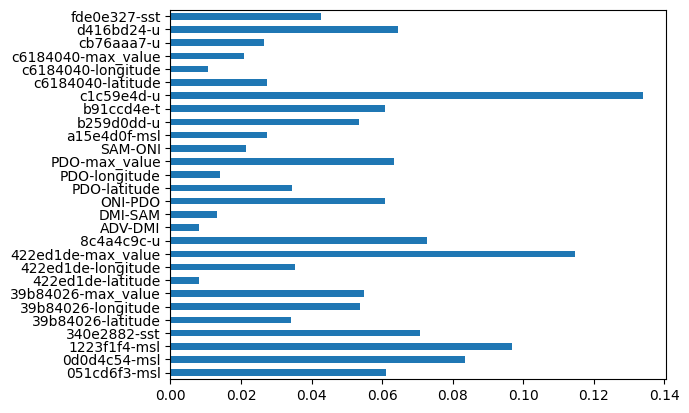

In [30]:
exp.get_feature_importance(season, name, method="svm")

In [31]:
id = "311dd366"
season=12
label = "HWF"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWF,Average
0,SVR-linear,12,r2,TSCV,3.823067e-01,3.823067e-01
0,SVR-linear,12,mape,TSCV,6.057313e+14,6.057313e+14


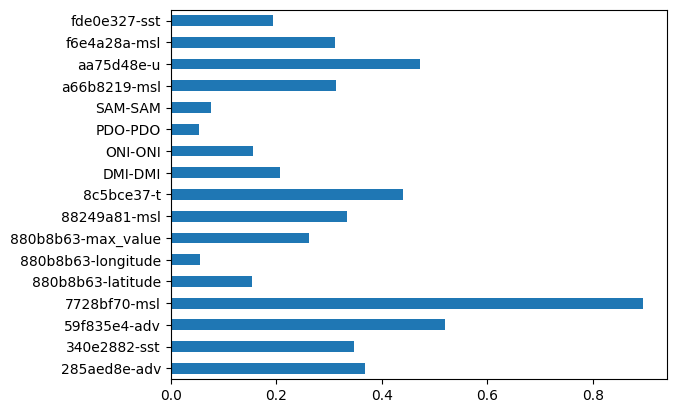

In [32]:
exp.get_feature_importance(season, "SVR-linear", method="svm")

In [33]:
id = "3df87a13"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022
285aed8e,index_285aed8e.parquet,anom,1,ADV,282|286|-42|-33,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,3.517485e-01,3.517485e-01
0,SVR-linear,12,mape,TSCV,3.857294e+14,3.857294e+14


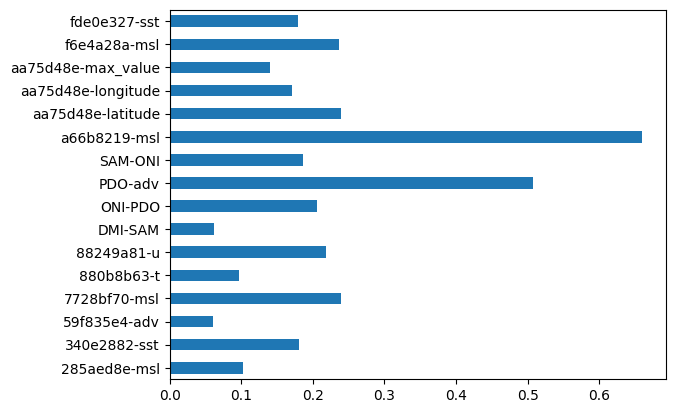

In [34]:
exp.get_feature_importance(season, name, method="svm")

In [35]:
id = "9f8163e4"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
c6b80290,index_c6b80290.parquet,anom,1,U,287.5|289.5|-37|-33,1980-2010,1972-2022
3111321a,index_3111321a.parquet,anom,1,U,286.5|288.5|-42|-37,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,3.579722e-01,3.579722e-01
0,SVR-linear,12,mape,TSCV,4.831125e+14,4.831125e+14


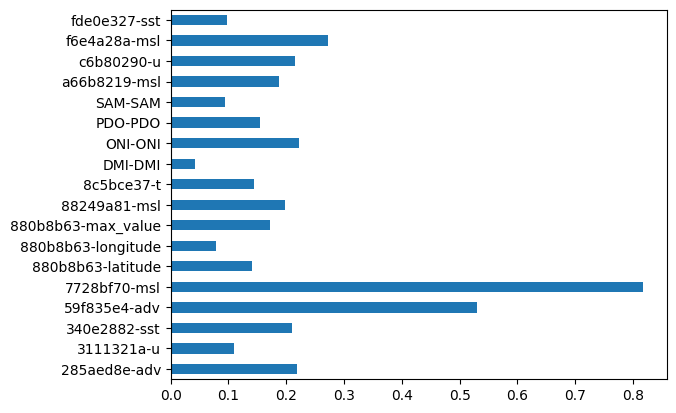

In [36]:
exp.get_feature_importance(season, name, "svm")

In [37]:
id = "978f49d7"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
43701738,index_43701738.parquet,anom,1,SP,282|290|-34|-30,1980-2010,1972-2022
e306f58b,index_e306f58b.parquet,anom,1,SP,282|290|-38|-34,1980-2010,1972-2022
e601b072,index_e601b072.parquet,anom,1,SP,282|290|-43|-38,1980-2010,1972-2022
ecaf68aa,index_ecaf68aa.parquet,anom,1,SP,282|290|-56|-43,1980-2010,1972-2022
711b08fc,index_711b08fc.parquet,max,1,SP,220|280|-35|-10,NoRef,1972-2022
89595d7b,index_89595d7b.parquet,anom,1,U10,282|290|-37|-30,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,-1.120256e+00,-1.120256e+00
0,SVR-linear,12,mape,TSCV,6.367123e+14,6.367123e+14


In [38]:
id = "13a24caf"
get_info_experiment(id, metadata_exp_path, my_indices_path, extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
a5df415f,index_a5df415f.parquet,max,1,MSL,245|284|-45|-15,1980-2010,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022
